# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Obervable trends from the data

# 1) Of the the 4 relationships explored, the only correlation found is between latitude and max temperature
# 2) In the Northern Hemisphere this a strong, negative, linear relationship
# 3) In the Southern Hemisphere this a strong, positive, linear relationship

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create base url and query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# create lists for holding values
final_cities1 = []
city_lat1 = []
city_long1 = []
city_max1 = []
city_hum1 = []
city_cloud1 = []
city_wind1 = []
city_country1 = []
city_date1 = []

In [5]:
# ping the api for each city and store the response within the lists
for index, x in enumerate(cities):
    
    response = requests.get(query_url + x).json()

    try:
        city_lat1.append(response["coord"]["lat"])
        city_long1.append(response["coord"]["lon"])
        city_max1.append(response["main"]["temp_max"])
        city_hum1.append(response["main"]["humidity"])
        city_cloud1.append(response["clouds"]["all"])
        city_wind1.append(response["wind"]["speed"])
        city_country1.append(response["sys"]["country"])
        city_date1.append(response["dt"])
        final_cities1.append(x)
        print(f"Processing Record {index} | {x}")
        
    except: 
        print("City not found. Skipping...")

Processing Record 0 | beringovskiy
Processing Record 1 | rikitea
Processing Record 2 | durant
Processing Record 3 | punta arenas
City not found. Skipping...
Processing Record 5 | salalah
Processing Record 6 | tuktoyaktuk
Processing Record 7 | alofi
Processing Record 8 | chumphon
City not found. Skipping...
Processing Record 10 | albany
Processing Record 11 | samarai
Processing Record 12 | nome
Processing Record 13 | sarszentmihaly
Processing Record 14 | new norfolk
Processing Record 15 | surt
Processing Record 16 | qujing
Processing Record 17 | dikson
Processing Record 18 | vaini
Processing Record 19 | chipinge
Processing Record 20 | saint-philippe
Processing Record 21 | jamestown
Processing Record 22 | yellowknife
City not found. Skipping...
Processing Record 24 | bathsheba
Processing Record 25 | sitka
Processing Record 26 | akyab
Processing Record 27 | mar del plata
City not found. Skipping...
Processing Record 29 | high level
Processing Record 30 | severo-kurilsk
Processing Record 3

Processing Record 257 | vila
Processing Record 258 | lander
Processing Record 259 | urucui
Processing Record 260 | bilma
Processing Record 261 | thinadhoo
Processing Record 262 | vila velha
Processing Record 263 | paamiut
Processing Record 264 | zhangye
Processing Record 265 | katiola
Processing Record 266 | bobcaygeon
Processing Record 267 | kawalu
Processing Record 268 | nikolskoye
Processing Record 269 | la paz
Processing Record 270 | angoche
Processing Record 271 | devli
City not found. Skipping...
Processing Record 273 | haines junction
Processing Record 274 | yatou
Processing Record 275 | alice springs
Processing Record 276 | farafangana
Processing Record 277 | yueyang
City not found. Skipping...
Processing Record 279 | ivybridge
Processing Record 280 | tuatapere
Processing Record 281 | junin
Processing Record 282 | vestmanna
Processing Record 283 | mount isa
Processing Record 284 | pahrump
Processing Record 285 | lagoa
Processing Record 286 | coihaique
Processing Record 287 | pa

Processing Record 508 | santiago de cao
Processing Record 509 | horta
Processing Record 510 | olyka
Processing Record 511 | vilyuysk
Processing Record 512 | katherine
Processing Record 513 | buchanan
Processing Record 514 | ikungi
Processing Record 515 | nanortalik
Processing Record 516 | jefferson city
Processing Record 517 | yerbogachen
Processing Record 518 | payson
Processing Record 519 | tomaszow lubelski
Processing Record 520 | san carlos
Processing Record 521 | olga
Processing Record 522 | aquiraz
Processing Record 523 | dingle
Processing Record 524 | orito
Processing Record 525 | mount gambier
Processing Record 526 | marzuq
Processing Record 527 | chitral
Processing Record 528 | leshukonskoye
Processing Record 529 | kankakee
Processing Record 530 | pauini
Processing Record 531 | aguimes
Processing Record 532 | ovre ardal
Processing Record 533 | macamic
Processing Record 534 | severomuysk
Processing Record 535 | caconda
Processing Record 536 | gelendzhik
Processing Record 537 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#turn lists into dictionary
final_cities_dict1 = {
    "City": final_cities1, 
    "Lat": city_lat1,
    "Lng": city_long1, 
    "Max Temp": city_max1, 
    "Humidity": city_hum1, 
    "Cloudiness": city_cloud1, 
    "Wind Speed": city_wind1, 
    "Country": city_country1, 
    "Date": city_date1
}

In [7]:
#turn dictionary into dataframe
final_cities_df = pd.DataFrame.from_dict(final_cities_dict1)

In [8]:
final_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beringovskiy,63.05,179.32,50.41,76,0,12.15,RU,1595466878
1,rikitea,-23.12,-134.97,66.94,65,100,14.67,PF,1595466759
2,durant,33.99,-96.37,87.80,58,1,12.75,US,1595466641
3,punta arenas,-53.15,-70.92,26.60,92,57,4.70,CL,1595466722
4,salalah,17.02,54.09,78.80,94,90,11.41,OM,1595466865


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
hot_cities_df = final_cities_df[final_cities_df["Humidity"] >= 100]
hot_cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
11,sarszentmihaly,47.15,18.34,69.01,100,28,3.31,HU,1595466881
24,mar del plata,-38.00,-57.56,52.00,100,90,18.34,AR,1595466733
106,hambantota,6.12,81.12,77.00,100,40,2.24,LK,1595466906
156,port elizabeth,-33.92,25.57,55.40,100,20,12.75,ZA,1595466922
159,tornio,65.85,24.15,60.80,100,20,6.93,FI,1595466923
171,skibbereen,51.55,-9.27,57.20,100,75,12.75,IE,1595466926
205,carnarvon,-24.87,113.63,64.40,100,0,11.41,AU,1595466938
237,katiola,8.13,-5.10,75.20,100,75,9.17,CI,1595466947
305,muhos,64.81,25.99,60.01,100,90,13.87,FI,1595466965
453,denpasar,-8.65,115.22,80.60,100,40,12.75,ID,1595467003


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
final_cities_df.drop(final_cities_df[final_cities_df["Humidity"] >= 100].index, inplace = True)
final_cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beringovskiy,63.05,179.32,50.41,76,0,12.15,RU,1595466878
1,rikitea,-23.12,-134.97,66.94,65,100,14.67,PF,1595466759
2,durant,33.99,-96.37,87.80,58,1,12.75,US,1595466641
3,punta arenas,-53.15,-70.92,26.60,92,57,4.70,CL,1595466722
4,salalah,17.02,54.09,78.80,94,90,11.41,OM,1595466865
...,...,...,...,...,...,...,...,...,...
528,kasulu,-4.58,30.10,66.20,77,0,3.49,TZ,1595467021
529,santiago del estero,-27.80,-64.26,59.65,46,100,3.62,AR,1595466878
530,derzhavinsk,51.10,66.32,68.32,66,100,18.66,KZ,1595466845
531,pevek,69.70,170.31,55.40,53,98,10.40,RU,1595467022


In [11]:
# Export the City_Data into a csv
final_cities_df.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

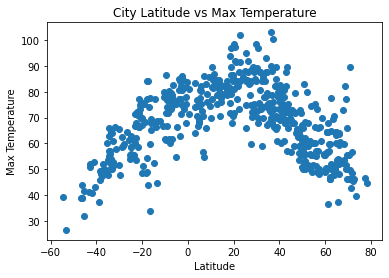

In [13]:
# Scatterplot 1 - Latitude vs Max Temperature
lat_max = plt.scatter(final_cities_df["Lat"], final_cities_df["Max Temp"])
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
lat_max

In [ ]:
#comparing latitude vs the max temperature. There seems to be a strong, non-linear relationship between the two variables that is positive when the latitude is < 0 and negative when the lat > 0

## Latitude vs. Humidity Plot

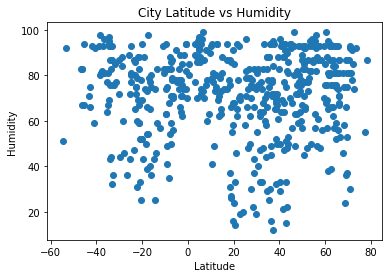

In [14]:
# Scatterplot 2 - Latitude vs Humidity
lat_hum = plt.scatter(final_cities_df["Lat"], final_cities_df["Humidity"])
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
lat_hum

In [ ]:
#This plot analyzes the relationship between latitude and humidity, and there doesn't appear to be a relationship. 

## Latitude vs. Cloudiness Plot

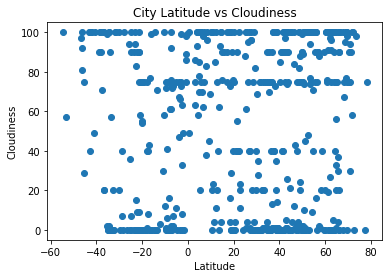

In [15]:
# Scatterplot 3 - Latitude vs Cloudiness
lat_cloud = plt.scatter(final_cities_df["Lat"], final_cities_df["Cloudiness"])
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
lat_cloud

In [ ]:
#This plot analyzes the relationship between latitude and cloudiness, and there doesn't appear to be a relationship. 

## Latitude vs. Wind Speed Plot

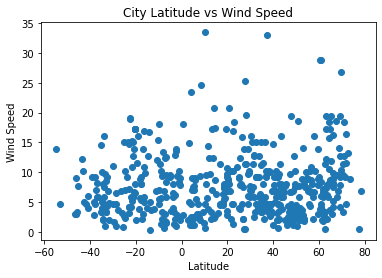

In [16]:
# Scatterplot 4 - Latitude vs Wind Speed
lat_wind = plt.scatter(final_cities_df["Lat"], final_cities_df["Wind Speed"])
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
lat_wind

In [ ]:
#This plot analyzes the relationship between latitude and wind speed, and there doesn't appear to be a relationship. 

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_function(x_input, y_input):
    x_values = x_input
    y_values = y_input
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    cor = st.pearsonr(x_values, y_values)
    plt
    print(f"The linear regression equation is: {line_eq}")
    print(f"The r-squared is: {round(cor[0],2)}")

In [19]:
# Create Northern and Southern Hemisphere DataFrames
# northern hemisphere dataframe
northern_cities = final_cities_df[final_cities_df["Lat"] > 0]
northern_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,beringovskiy,63.05,179.32,50.41,76,0,12.15,RU,1595466878
2,durant,33.99,-96.37,87.80,58,1,12.75,US,1595466641
4,salalah,17.02,54.09,78.80,94,90,11.41,OM,1595466865
5,tuktoyaktuk,69.45,-133.04,46.40,75,75,12.75,CA,1595466879
7,chumphon,10.33,98.83,77.00,94,20,0.67,TH,1595466880
...,...,...,...,...,...,...,...,...,...
526,novopokrovka,49.84,36.55,57.20,67,0,4.47,UA,1595467021
527,beauvais,49.42,2.00,55.40,76,0,3.36,FR,1595467021
530,derzhavinsk,51.10,66.32,68.32,66,100,18.66,KZ,1595466845
531,pevek,69.70,170.31,55.40,53,98,10.40,RU,1595467022


In [20]:
#southern hemisphere dataframe
southern_cities = final_cities_df[final_cities_df["Lat"] < 0]
southern_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,rikitea,-23.12,-134.97,66.94,65,100,14.67,PF,1595466759
3,punta arenas,-53.15,-70.92,26.60,92,57,4.70,CL,1595466722
6,alofi,-19.06,-169.92,75.20,88,75,16.11,NU,1595466807
9,samarai,-10.62,150.67,77.90,81,58,12.01,PG,1595466880
12,new norfolk,-42.78,147.06,51.01,75,100,5.01,AU,1595466787
...,...,...,...,...,...,...,...,...,...
507,oranjemund,-28.55,16.43,59.14,60,0,1.07,NA,1595467016
520,aripuana,-9.17,-60.63,76.95,49,6,1.25,BR,1595467019
521,constitucion,-35.33,-72.42,48.42,77,2,3.27,CL,1595467020
528,kasulu,-4.58,30.10,66.20,77,0,3.49,TZ,1595467021


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression equation is: y = -0.46x + 88.24
The r-squared is: -0.67


Text(0, 0.5, 'Max Temp')

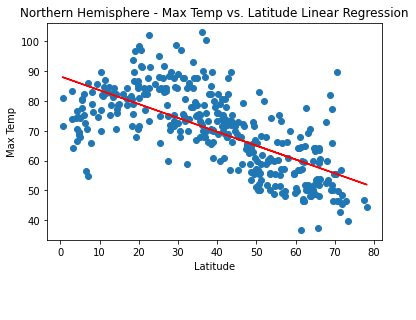

In [23]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
linear_regression_function(northern_cities["Lat"], northern_cities["Max Temp"])

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The linear regression equation is: y = 0.78x + 80.02
The r-squared is: 0.78


Text(0, 0.5, 'Max Temp')

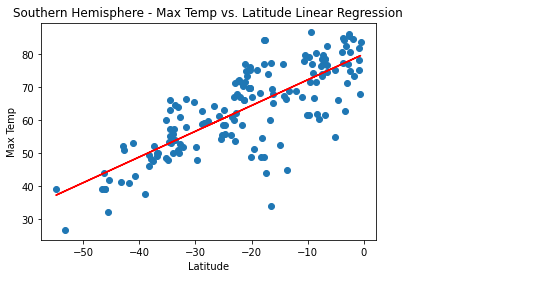

In [24]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
linear_regression_function(southern_cities["Lat"], southern_cities["Max Temp"])

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression equation is: y = 0.04x + 70.27
The r-squared is: 0.04


Text(0, 0.5, 'Humidity')

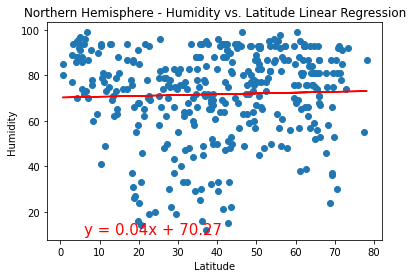

In [25]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linear_regression_function(northern_cities["Lat"], northern_cities["Humidity"])

plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The linear regression equation is: y = -0.14x + 68.61
The r-squared is: -0.1


Text(0, 0.5, 'Humidity')

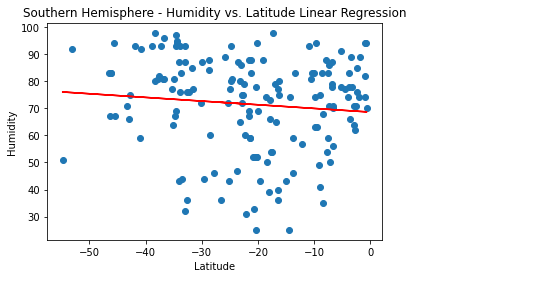

In [26]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
linear_regression_function(southern_cities["Lat"], southern_cities["Humidity"])

plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression equation is: y = 0.01x + 52.82
The r-squared is: 0.0


Text(0, 0.5, 'Humidity')

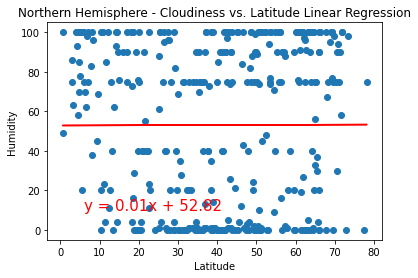

In [27]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linear_regression_function(northern_cities["Lat"], northern_cities["Cloudiness"])

plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The linear regression equation is: y = -0.39x + 36.86
The r-squared is: -0.13


Text(0, 0.5, 'Humidity')

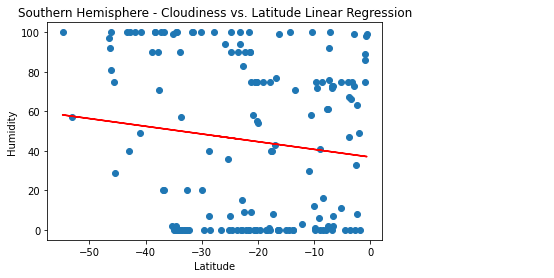

In [28]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
linear_regression_function(southern_cities["Lat"], southern_cities["Cloudiness"])

plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression equation is: y = 0.01x + 7.13
The r-squared is: 0.05


Text(0, 0.5, 'Wind Speed')

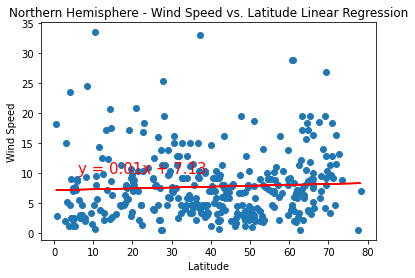

In [29]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linear_regression_function(northern_cities["Lat"], northern_cities["Wind Speed"])

plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The linear regression equation is: y = 0.02x + 7.89
The r-squared is: 0.06


Text(0, 0.5, 'Wind Speed')

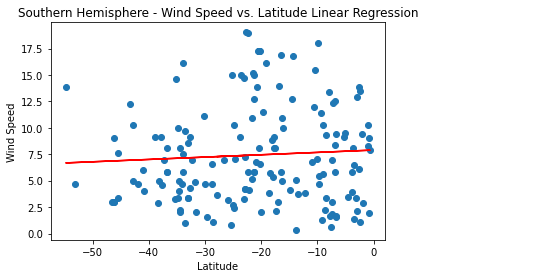

In [30]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
linear_regression_function(southern_cities["Lat"], southern_cities["Wind Speed"])

plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")